# Working with APIs

API stands for Application Programming Interface
APIs are a way for applications to talk to each other.
In Python, we use the 'requests' package to handle the connection.
<b>Note: It is 'requests' with an 's' not 'request' (This is a different package)</b>
Most APIs communicate with data in the form of JSON
JSON stands for JavaScript Object Notation

In [1]:
# import the packages we need:
import requests, json

We will be connecting to the Ergast F1 Racer API today: http://ergast.com/mrd/

to view JSON data nicely in the browser, install the extension JSONview

In [ ]:
# You can see some info on how to use this package by typing:
# help(requests)

In [3]:
url = "http://ergast.com/api/f1/2008/5/driverStandings.json"

In [4]:
# Response object
response = requests.get(url)
print(response)

<Response [200]>


#### You can check MDN documentation - HTTP response status codes for what these responses mean:

https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [5]:
# Check and make sure we got a successful response from the API
response.ok

True

In [6]:
# View the response as a JSON
response.json()

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2008/5/driverstandings.json',
  'limit': '30',
  'offset': '0',
  'total': '22',
  'StandingsTable': {'season': '2008',
   'round': '5',
   'StandingsLists': [{'season': '2008',
     'round': '5',
     'DriverStandings': [{'position': '1',
       'positionText': '1',
       'points': '35',
       'wins': '2',
       'Driver': {'driverId': 'raikkonen',
        'permanentNumber': '7',
        'code': 'RAI',
        'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
        'givenName': 'Kimi',
        'familyName': 'Räikkönen',
        'dateOfBirth': '1979-10-17',
        'nationality': 'Finnish'},
       'Constructors': [{'constructorId': 'ferrari',
         'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
         'name': 'Ferrari',
         'nationality': 'Italian'}]},
      {'position': '2',
       'positionText': '2',
       'points': '28',
       'wins': '2',
 

In [8]:
type(response.json())

dict

In [24]:
# We only want the Driver Standings
my_racer_data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][0]
my_racer_data
# this shows the driver who's ranked 1.

{'position': '1',
 'positionText': '1',
 'points': '35',
 'wins': '2',
 'Driver': {'driverId': 'raikkonen',
  'permanentNumber': '7',
  'code': 'RAI',
  'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
  'givenName': 'Kimi',
  'familyName': 'Räikkönen',
  'dateOfBirth': '1979-10-17',
  'nationality': 'Finnish'},
 'Constructors': [{'constructorId': 'ferrari',
   'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
   'name': 'Ferrari',
   'nationality': 'Italian'}]}

In [21]:
# We can also use a variable for the index position and throw it in a for loop to get info for each ranked driver
for x in range(5):
    data1 = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][x]
    print(data1)

{'position': '1', 'positionText': '1', 'points': '35', 'wins': '2', 'Driver': {'driverId': 'raikkonen', 'permanentNumber': '7', 'code': 'RAI', 'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen', 'givenName': 'Kimi', 'familyName': 'Räikkönen', 'dateOfBirth': '1979-10-17', 'nationality': 'Finnish'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}
{'position': '2', 'positionText': '2', 'points': '28', 'wins': '2', 'Driver': {'driverId': 'massa', 'permanentNumber': '19', 'code': 'MAS', 'url': 'http://en.wikipedia.org/wiki/Felipe_Massa', 'givenName': 'Felipe', 'familyName': 'Massa', 'dateOfBirth': '1981-04-25', 'nationality': 'Brazilian'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}
{'position': '3', 'positionText': '3', 'points': '28', 'wins': '1', 'Driver': {'driverId': 'ham

In [22]:
# We can also isolate and get specific info from each dict item (which is an element in the list)
for x in range(5):
    data1 = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][x]['Driver']['familyName']
    print(data1)


Räikkönen
Massa
Hamilton
Kubica
Heidfeld


In [30]:
# Going back to the main Driver Standings list and working with the items within
my_racer_data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
my_racer_data

[{'position': '1',
  'positionText': '1',
  'points': '35',
  'wins': '2',
  'Driver': {'driverId': 'raikkonen',
   'permanentNumber': '7',
   'code': 'RAI',
   'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
   'givenName': 'Kimi',
   'familyName': 'Räikkönen',
   'dateOfBirth': '1979-10-17',
   'nationality': 'Finnish'},
  'Constructors': [{'constructorId': 'ferrari',
    'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
    'name': 'Ferrari',
    'nationality': 'Italian'}]},
 {'position': '2',
  'positionText': '2',
  'points': '28',
  'wins': '2',
  'Driver': {'driverId': 'massa',
   'permanentNumber': '19',
   'code': 'MAS',
   'url': 'http://en.wikipedia.org/wiki/Felipe_Massa',
   'givenName': 'Felipe',
   'familyName': 'Massa',
   'dateOfBirth': '1981-04-25',
   'nationality': 'Brazilian'},
  'Constructors': [{'constructorId': 'ferrari',
    'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
    'name': 'Ferrari',
    'nationality': 'Italian'}]},
 {'po

In [31]:
def get_racer_info(data):
    new_data = []
    for racer in data:
        racer_dict = {}
        racer_name = f"{racer['Driver']['givenName']} {racer['Driver']['familyName']}"
        racer_dict[racer_name] = {
            'first_name':racer['Driver']['givenName'],
            'last_name':racer['Driver']['familyName'],
            'position':racer['position'],
            'wins':racer['wins'],
            'DOB':racer['Driver']['dateOfBirth'],
            'nationality':racer['Driver']['nationality'],
            'constructor':racer['Constructors'][0]['name']
        }
        new_data.append(racer_dict)
    return new_data

get_racer_info(my_racer_data)

[{'Kimi Räikkönen': {'first_name': 'Kimi',
   'last_name': 'Räikkönen',
   'position': '1',
   'wins': '2',
   'DOB': '1979-10-17',
   'nationality': 'Finnish',
   'constructor': 'Ferrari'}},
 {'Felipe Massa': {'first_name': 'Felipe',
   'last_name': 'Massa',
   'position': '2',
   'wins': '2',
   'DOB': '1981-04-25',
   'nationality': 'Brazilian',
   'constructor': 'Ferrari'}},
 {'Lewis Hamilton': {'first_name': 'Lewis',
   'last_name': 'Hamilton',
   'position': '3',
   'wins': '1',
   'DOB': '1985-01-07',
   'nationality': 'British',
   'constructor': 'McLaren'}},
 {'Robert Kubica': {'first_name': 'Robert',
   'last_name': 'Kubica',
   'position': '4',
   'wins': '0',
   'DOB': '1984-12-07',
   'nationality': 'Polish',
   'constructor': 'BMW Sauber'}},
 {'Nick Heidfeld': {'first_name': 'Nick',
   'last_name': 'Heidfeld',
   'position': '5',
   'wins': '0',
   'DOB': '1977-05-10',
   'nationality': 'German',
   'constructor': 'BMW Sauber'}},
 {'Heikki Kovalainen': {'first_name': 'Hei

In [38]:
def get_driver_info_by_yr_and_round(yr, r):
    url = f"https://ergast.com/api/f1/{yr}/{r}/driverStandings.json"
    response = requests.get(url)
    if not response.json()['MRData']['StandingsTable']['StandingsLists']:
        return 'We had an error loading your data 🤡💩☠️ It is likely the year or round is not in the database'
    data = response.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
    return get_racer_info(data)

get_driver_info_by_yr_and_round(2019,4)

[{'Valtteri Bottas': {'first_name': 'Valtteri',
   'last_name': 'Bottas',
   'position': '1',
   'wins': '2',
   'DOB': '1989-08-28',
   'nationality': 'Finnish',
   'constructor': 'Mercedes'}},
 {'Lewis Hamilton': {'first_name': 'Lewis',
   'last_name': 'Hamilton',
   'position': '2',
   'wins': '2',
   'DOB': '1985-01-07',
   'nationality': 'British',
   'constructor': 'Mercedes'}},
 {'Sebastian Vettel': {'first_name': 'Sebastian',
   'last_name': 'Vettel',
   'position': '3',
   'wins': '0',
   'DOB': '1987-07-03',
   'nationality': 'German',
   'constructor': 'Ferrari'}},
 {'Max Verstappen': {'first_name': 'Max',
   'last_name': 'Verstappen',
   'position': '4',
   'wins': '0',
   'DOB': '1997-09-30',
   'nationality': 'Dutch',
   'constructor': 'Red Bull'}},
 {'Charles Leclerc': {'first_name': 'Charles',
   'last_name': 'Leclerc',
   'position': '5',
   'wins': '0',
   'DOB': '1997-10-16',
   'nationality': 'Monegasque',
   'constructor': 'Ferrari'}},
 {'Sergio Pérez': {'first_nam

## Homework
Check out this Pokemon API https://pokeapi.co/. Use the requests package to connect to this API and get and store data for 5 different pokemon. Get the pokemons' **name**, **at least one ability's name**, **base_experience**, and the **URL for its sprite**(an image that shows up on screen) for the 'front_shiny', **attack base_stat**, **hp base_stat**, **defense base_stat**.

Which Pokemon would you like to view? snorlax

Snorlax:
---------------
Ability 1: Immunity
Ability 2: Thick-Fat
Ability 3: Gluttony (Hidden)

Base Experience: 189

Base HP: 160
Base Attack: 110
Base Defense: 65


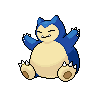

In [10]:
import requests, json
from IPython.display import Image

# pokemon name
# pokemon abilities
# base_xp
# sprite
# base_stat: hp, attack, defense

def get_pokemon():
    poke = input("Which Pokemon would you like to view? ") 
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{poke.lower()}")
    base_xp = response.json()['base_experience']
    base_hp = response.json()['stats'][0]['base_stat']
    base_attack = response.json()['stats'][1]['base_stat']
    base_def = response.json()['stats'][2]['base_stat']
    if not response.ok:
        print('Unable to process request. HTTP Status Code: {response.status_code}. Please also check your spelling.')
    
    print(f"\n{poke.title()}:")
    print('---------------')
    abilities = response.json()['abilities'][:]
    for x in range(len(abilities)):
        ab_name = response.json()['abilities'][x]['ability']['name']
        hidden = response.json()['abilities'][x]['is_hidden']
        if hidden:
            print(f"Ability {x+1}: {ab_name.title()} (Hidden)")
        else:
            print(f"Ability {x+1}: {ab_name.title()}")
    print(f"\nBase Experience: {base_xp}\n")
    print(f"Base HP: {base_hp}")
    print(f"Base Attack: {base_attack}")
    print(f"Base Defense: {base_def}")

    url_sprite = response.json()['sprites']['front_shiny']
    display(Image(url_sprite))

    
get_pokemon()

# If you need help thinking of some Pokemon names to try out:
# pikachu, charizard, snorlax, charmander, ditto 
    
    